In [13]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import math
from numpy import arange

from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import pylab

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import MeanCenterer
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



In [14]:
%matplotlib inline


# Lasso and Elastic Net

Lasso and elastic net (L1 and L2 penalisation) implemented using a
coordinate descent.

The coefficients can be forced to be positive.


Automatically created module for IPython interactive environment
Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


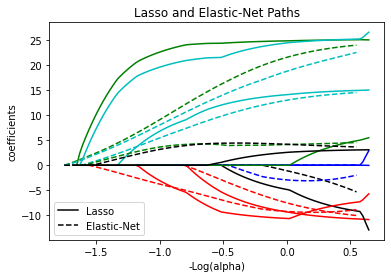

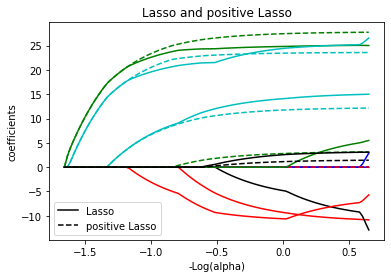

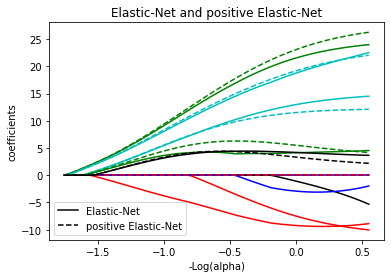

In [15]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

# Display results

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

In [16]:
dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')

int_data=dataframe.drop(['Steel','Texp','Pa','Rc','lnRc'], axis = 1)
dataframe = pd.DataFrame(dataframe)



interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(int_data)
interaction1
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(int_data), columns=interaction.get_feature_names(int_data.columns))
#print (features)

features = pd.DataFrame(features)
interaction_data = features


a = dataframe[dataframe.columns[-4:]]
frames = [interaction_data, a]
data = pd.concat(frames, axis=1)
data

X=data.drop(['Texp'], axis = 1)
y=data.Texp
x=x.astype(float)
y=y.astype(float)




,Steel,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc,Texp
0,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,60.000,4.094345,770
1,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,8.500,2.140066,805
2,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.650,-0.430783,825
3,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.050,-2.995732,840
4,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,6.000,1.791759,755
1268,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,3.000,1.098612,775
1269,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,1.500,0.405465,790
1270,XOM07,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,1286.59,1.500,0.405465,650


In [17]:

interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(int_data)
interaction1
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(int_data), columns=interaction.get_feature_names(int_data.columns))
#print (features)

features = pd.DataFrame(features)
interaction_data = features


In [20]:
a = dataframe[dataframe.columns[-4:]]
frames = [interaction_data, a]
data = pd.concat(frames, axis=1)
data

X=data.drop(['Texp'], axis = 1)
y=data.Texp
x=x.astype(float)
y=y.astype(float)

y

0       770.0
1       805.0
2       825.0
3       840.0
4       855.0
        ...  
1267    755.0
1268    775.0
1269    790.0
1270    650.0
1271    685.0
Name: Texp, Length: 1272, dtype: float64

Computing regularization path using the lasso...
Computing regularization path using the elastic net...


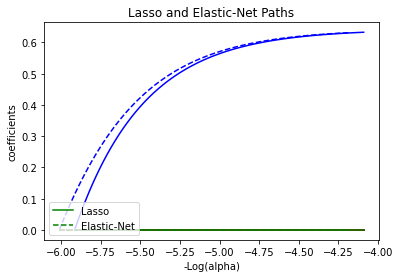

In [25]:

eps = 15e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)


# Display results
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")

plt.show()